## Analyzing different correlation metrics

<font size='2.2'>Spearman’s $\rho_{}$ and Kendall’s $\tau_{}$ are rank correlations or measures of concordance. They measure how a positive change in the X-dimension coincides or co-occur with a positive change in the Y-dimension. Furthermore, they are both transformation invariant. Spearman’s $\rho_{}$ and Kendall’s $\tau_{}$ for X and Y are the same for $\varphi{}(X)$ and $\psi_{}(Y)$, when $\varphi$ and $\psi$ are both monotone increasing or monotone decreasing functions. 

<font size='2.2'> The three most popular classical measures of statistical association are Pearson’s correlation coefficient, Spearman’s ρ, and
Kendall’s τ . These coefficients are very powerful for detecting
linear or monotone associations, and they have well-developed
asymptotic theories for calculating p-values. However, the big
problem is that they are not effective for detecting associations
that are not monotonic, even in the complete absence of noise.

## What is $\xi_{n}$ ?
<font size='2.5'>$ \text{It is 0 if and only if X and Y are independent, and it is 1 iff there is a measurable function} \\ \\ f : R → R \ \ni Y = f(X)
\ almost \ surely.$


In [1]:
#install.packages('XICOR')
install.packages('minerva')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(XICOR) # loading the xicor library
library(minerva) # for MIC

### Performance of $\xi_{n}(X,Y)$ under non-linear-non-monotonic function 

<font size='2.5'> $x= U(0,1)\\ y=\frac{1}{e^{x^2}}; \ if\ x\le 0.5 \\ y=e^{x^3}; \ otherwise $

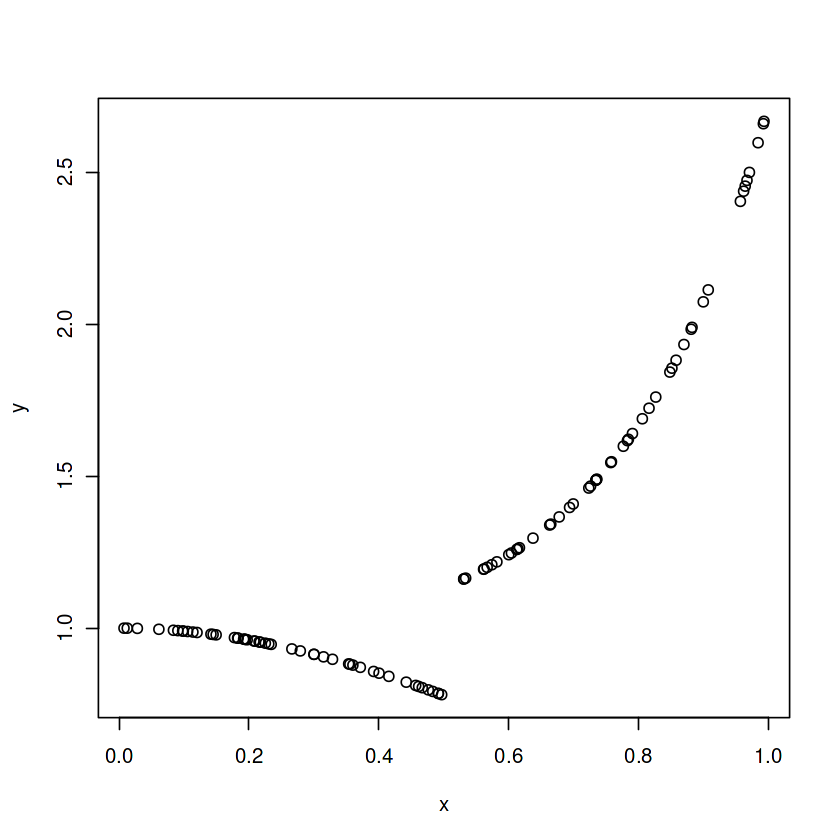

In [79]:
set.seed(1369)
n=100
x=runif(n)
y=c()
for (i in 1:n)
{
if (x[i]<=0.5)
y[i]=(1/(exp(x[i]^2)))
else
y[i]=(exp(x[i]^3))
}
plot(x,y)

In [80]:
xi=genxicor(x,y)$xi
data=cbind(x,y)
# Calculate MIC
mic_result = mine(data)
# Print MIC value
paste("MIC: ",mic_result$MIC[2,1])
paste("kendall's: " ,cor(x,y,method="kendall"))
paste("spearman's: ",cor(x,y,method="spearman"))
paste("Pearson's: ",cor(x,y))
paste('xicor: ', xi)

[1] "MIC:  1"

[1] "kendall's:  0.505050505050505"

[1] "spearman's:  0.75007500750075"

[1] "Pearson's:  0.839062521140341"

[1] "xicor:  0.955595559555956"

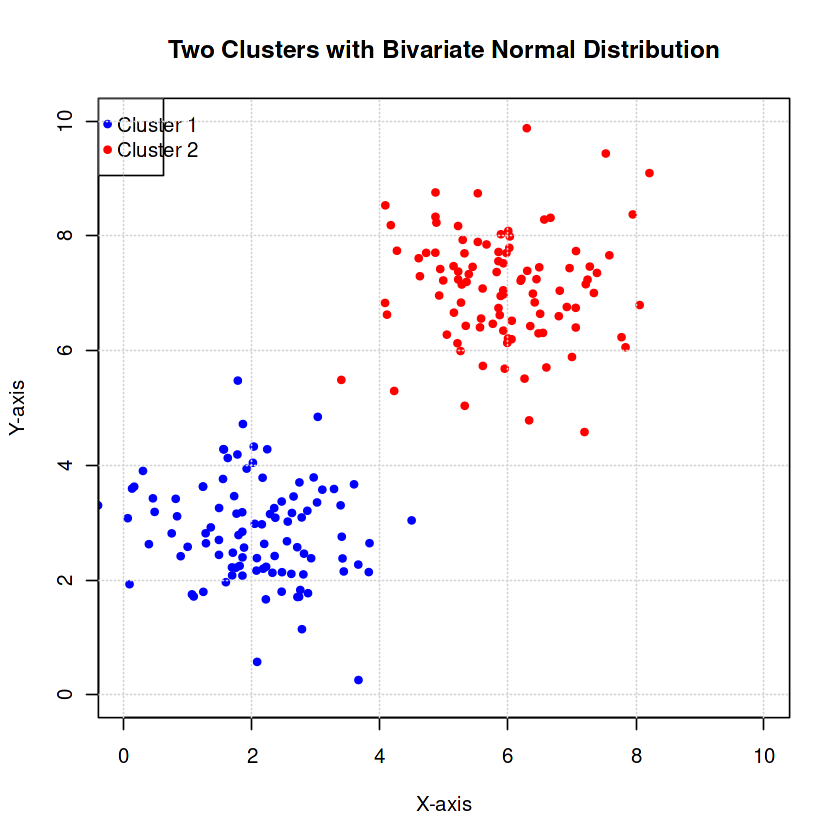

In [81]:
# Set seed for reproducibility
set.seed(1369)
library(MASS)
# Parameters
cluster1_center = c(2, 3)  # Center of first cluster
cluster2_center = c(6, 7)  # Center of second cluster
covariance_matrix = matrix(c(1, 0, 0, 1), nrow = 2, ncol = 2)  # Identity covariance matrix
num_samples = 100  # Number of samples per cluster

# Generate samples for first cluster
cluster1_samples = mvrnorm(n = num_samples, mu = cluster1_center, Sigma = covariance_matrix)

# Generate samples for second cluster
cluster2_samples = mvrnorm(n = num_samples, mu = cluster2_center, Sigma = covariance_matrix)
data=rbind(cluster1_samples,cluster2_samples)
x=data[,1]
y=data[,2]
#plot(x,y)
# Plot the clusters
plot(cluster1_samples[,1], cluster1_samples[,2], col = "blue", pch = 20, xlim = c(0, 10), ylim = c(0, 10),
     xlab = "X-axis", ylab = "Y-axis", main = "Two Clusters with Bivariate Normal Distribution")
points(cluster2_samples[,1], cluster2_samples[,2], col = "red", pch = 20)
legend("topleft", legend = c("Cluster 1", "Cluster 2"), col = c("blue", "red"), pch = 20)
grid()

<font size='3'> Maximal Information Coefficient (MIC), Pearson, Spearman, and Kendall correlation

In [82]:
# Calculate MIC
mic_result = mine(data)
# Print MIC value
paste("MIC: ",mic_result$MIC[2,1])
paste("pearson's correlation: ", cor(x,y)) 
paste("Spearman's correlation: ",cor(x, y, method = "spearman"))
paste("Kendall's correlation: ",cor(x, y, method = "kendall"))
paste("xicor: ",genxicor(x,y)$xi)

[1] "MIC:  0.999999999999999"

[1] "pearson's correlation:  0.809199160780356"

[1] "Spearman's correlation:  0.71598439960999"

[1] "Kendall's correlation:  0.458693467336683"

[1] "xicor:  0.471386784669617"

## The asymptotic property

<font size='2.5'>What happens to $\xi_{n}(X,Y)$ when X and Y are identical?

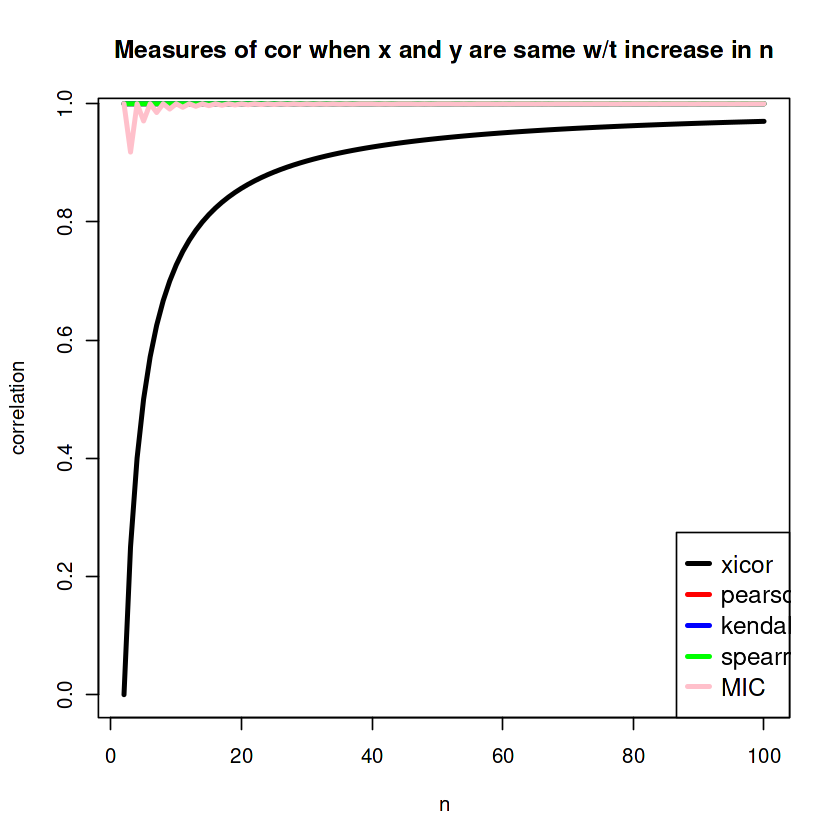

In [83]:
n=2:100
xi_n=c()
tau=c()
rho=c()
sp=c()
mi=c()
for (i in n)
{
x=rnorm(i)
y=x # 
xi_n[i-1]=genxicor(x,y)$xi
rho[i-1]= cor(x,y)
tau[i-1]=cor(x,y,method='kendall')
sp[i-1]=cor(x,y,method='spearman')  
mi[i-1]=mine(cbind(x,y))$MIC[2,1]
    }
plot(n,xi_n,type='l', main="Measures of cor when x and y are same w/t increase in n",ylab="correlation",lwd=3)
lines(n,rho,lwd=3,col='red')
lines(n,tau,lwd=3,col='blue')
lines(n,sp,lwd=3,col='green')
lines(n,mi,lwd=3,col='pink')
legend("bottomright",legend=c("xicor","pearson's","kendall's","spearman's","MIC"),col=c('black','red','blue','green','pink'),lwd = c(3,3,3,3),cex =1.2)


## Hypothesis testing

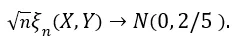
<font size='3'>$ as \ n\to \infty \\ \\ \text{Then X and Y are independent}$

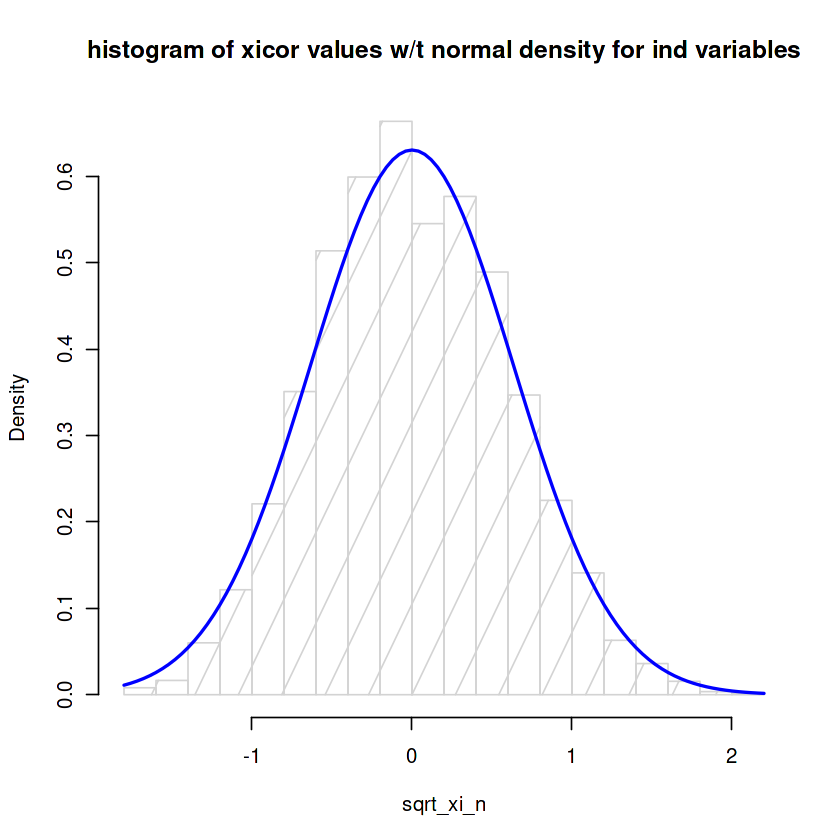

In [84]:
n=20
nsim=10^4
xi_n=c()
for (i in 1:nsim)
{

x=runif(n)
y=runif(n)
xi_n[i]= genxicor(x,y)$xi
}
sqrt_xi_n=sqrt(n)*xi_n
hist(sqrt_xi_n,prob=T,density=2,breaks=20, main="histogram of xicor values w/t normal density for ind variables")
curve(dnorm(x,mean=0,sd=sqrt(2/5)), col = "blue", lwd = 2, add = TRUE, yaxt = "n")

<font size='3'> $\text{Finding the p-value for } \xi_{n}: $

<font size='3'> $ 1-F(\xi_{n})$

<font size='2.5'> $ F(\xi_{n}) \text{ is the distribution function i.e. }\\ \\ p(X\le \xi_{n}) \text{ for the normal distribution with mean }\mu \ as \ 0 \ and \ \sigma^2 \ as \ 2/5$
    

In [86]:
n=20
x=runif(n)
y=runif(n)
xi=genxicor(x,y)$xi
1-(pnorm(sqrt(n)*xi,0,sqrt(2/5))) # in case of non-ties 

[1] 0.3548863

### Using Permutation test

[1] "Correctly identified independence:  100 % of times"

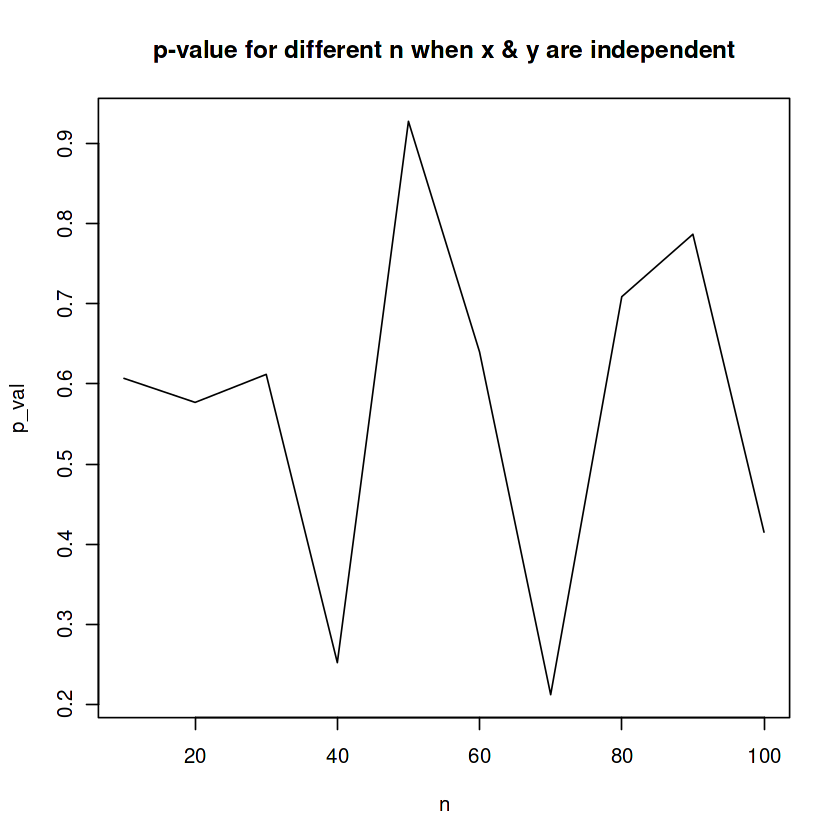

In [101]:
n= seq(10,100,by=10)
count=1
p_val=c()
perm=1000
for(i in n)
{    
x=runif(i)
y=runif(i)
xi_cor=genxicor(x,y)$xi
#label_x=rep('x',i)
#label_y=rep('y',i)
val=c(x,y)
label=c(label_x,label_y)
data_mat=cbind(val,label)
per_samp=matrix(0,nrow=2*i,ncol=perm)
per_xi=c()
for (p in 1:perm)
{
per_samp[,p]=sample(val,2*i,replace = F)  
x_temp=per_samp[1:i,p]
y_temp=per_samp[(i+1):(2*i),p]
per_xi[p]=genxicor(x_temp,y_temp)$xi
}
p_val[count]=mean((xi_cor>=per_xi))
    count=count+1
    }
paste("Correctly identified independence: ",(sum((p_val>=0.05))/length(n))*100,"% of times")
plot(n,p_val,main="p-value for different n when x & y are independent",type="l")

### Let's get back to the identical case i.e. X=Y and see, whether using p-value we can talk about dependence between X and Y

In [119]:
nsim=20
n=10
count=1
perm=1000
xi_n_p=c()
p_val_xi=c()
for (i in 1:nsim)
{
    x=rnorm(n)
    y=x
    xi_n=genxicor(x,y)$xi
    per_samp=matrix(0,nrow=2*n,ncol=perm)
    val=c(x,y)
    for (p in 1:perm)
        {
per_samp[,p]=sample(val,2*n,replace = F)  
x_temp=per_samp[1:n,p]
y_temp=per_samp[(n+1):(2*n),p]
 # 
xi_n_p[p]=genxicor(x_temp,y_temp)$xi
    }
    p_val_xi[i]= mean((xi_n_p>=xi_n))
    
    }
paste("Correctly identified identicals: ",(mean((p_val_xi<0.05)))*100,"% of times")

[1] "Correctly identified identicals:  100 % of times"

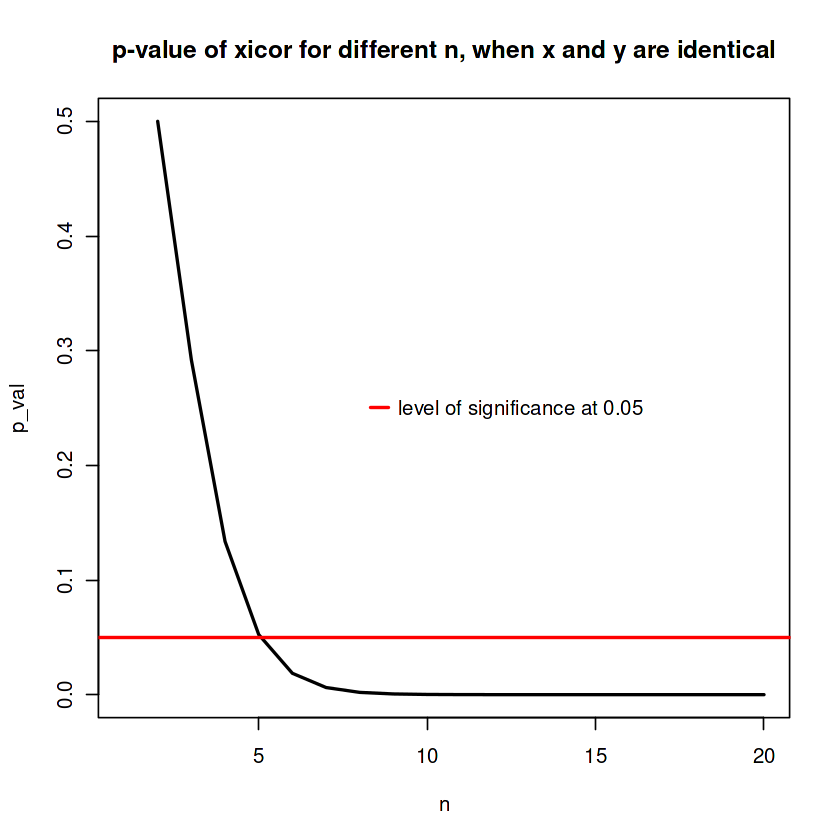

In [141]:
n=1:20
p_val=c()
for (i in n)
    {
x=rnorm(i)
y=x
p_val[i]=genxicor(x,y)$pval
    }
plot(p_val,type="l",main="p-value of xicor for different n, when x and y are identical",lwd=2,xlab="n")
abline(h=0.05,col='red',lwd=2)
legend("center",legend="level of significance at 0.05",col="red",lwd=2,cex=1,bty = "n" )


In [129]:
genxicor(x,y)$p

[1] 0.01861386

## Source

<font size='2.5'>[A New Coefficient of Correlation](https://towardsdatascience.com/a-new-coefficient-of-correlation-64ae4f260310)
    
<font size='2.5'>[Chatterjee, S. (2021). A New Coefficient of Correlation. Journal of the American Statistical Association, 116(536), 2009–2022.](https://doi.org/10.1080/01621459.2020.1758115)